In [5]:
import pandas as pd
from pm4py.objects.conversion.log import converter as log_converter
from pm4py.objects.log.util import dataframe_utils
from pm4py.algo.discovery.inductive import algorithm as inductive_miner
from pm4py.objects.conversion.process_tree import converter as pt_converter
from pm4py.visualization.process_tree import visualizer as pt_vis
from pm4py.visualization.petri_net import visualizer as pn_vis


In [3]:

# Create event log L2 with repetitions
data = []

# Helper to add traces
def add_trace(trace, count, base_date):
    for i in range(count):
        case_id = f"{trace}_{i}"
        for idx, activity in enumerate(trace.split(',')):
            data.append({
                "case:concept:name": case_id,
                "concept:name": activity.strip(),
                "time:timestamp": pd.Timestamp(base_date) + pd.Timedelta(seconds=idx)
            })

# Add each type of trace
add_trace("a,b,c,e", 50, "2025-01-01")
add_trace("a,c,b,e", 40, "2025-01-02")
add_trace("a,b,c,d,b,c,e", 30, "2025-01-03")
add_trace("a,c,b,d,b,c,e", 20, "2025-01-04")
add_trace("a,b,c,d,c,b,e", 10, "2025-01-05")
add_trace("a,c,b,d,c,b,d,b,c,e", 10, "2025-01-06")

# Create DataFrame and convert
df = pd.DataFrame(data)
df = dataframe_utils.convert_timestamp_columns_in_df(df)

# Convert to Event Log
event_log = log_converter.apply(df, variant=log_converter.Variants.TO_EVENT_LOG)



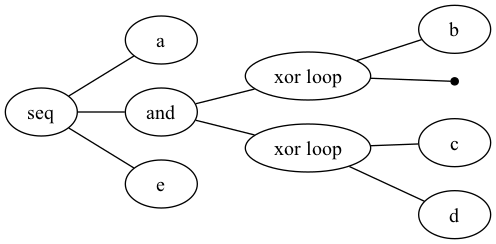

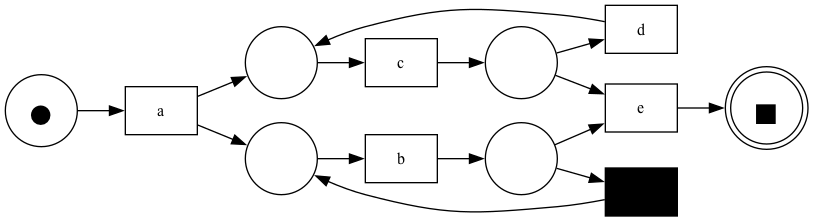

In [7]:

process_tree = inductive_miner.apply(event_log)

# Apply Inductive Miner to obtain the Petri net
net, initial_marking, final_marking = pt_converter.apply(process_tree)


# Visualize Process Tree
pt_gviz = pt_vis.apply(process_tree)
pt_vis.view(pt_gviz)

# Visualize Petri Net
pn_gviz = pn_vis.apply(net, initial_marking, final_marking)
pn_vis.view(pn_gviz)